In [1]:
import graphicalpivots as gp
import pandas as pd
import random
import networkx as nx
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
species = { "cat" : "mammal", 
         "dog" :"mammal", 
         "mouse" : "mammal", 
       "parrot" : "bird", 
       "hamster" : "mammal",
       "ostrich" : "bird", 
       "turkey" : "bird", 
       "budgie" : "bird", 
       "horse" : "mammal", 
       "carp" : "fish", 
       "sparrow" : "bird", 
       "cow" : "mammal", 
       "pig" : "mammal", 
       "sloth":"mammal", 
       "toucan" : "bird", 
        "baboon" : "mammal", 
        "spider" : "arachnid", 
        "anteater" :"mammal",  
        "porpoise" : "mammal",
        "elephant" : "mammal",
        "rhino" : "mammal", 
        "albatross":"bird", 
        "frog" : "amphibian", 
        "axolotl" : "amphibian", 
        "squid" : "mollusc", 
        "sponge" : "poriferan"}

data=[]
v_keys=list(species.keys())
for e,l in enumerate("abcdefghijklmnopqrstuvwxyz"):
    data.append({"layer" : min(e//8,2), "name" : l, "value" : v_keys[e], "classification" : species[v_keys[e]], "rand": random.choice(range(0,6))})
data_df = pd.DataFrame(data)
data_df['__all__']=True

data_df
    

,layer,name,value,classification,rand,__all__
0,0,a,cat,mammal,1,True
1,0,b,dog,mammal,5,True
2,0,c,mouse,mammal,2,True
3,0,d,parrot,bird,0,True
4,0,e,hamster,mammal,0,True
5,0,f,ostrich,bird,1,True
6,0,g,turkey,bird,1,True
7,0,h,budgie,bird,3,True
8,1,i,horse,mammal,1,True
9,1,j,carp,fish,2,True


In [22]:

template_spec = { "root" : { 
                             "partition" : {"template" : "Layer0",
                                            "fields" :["__all__"],
                                            "layout" :  "fill"},
                            "style" : "red"

                            },
                "Layer0" : { 
                            "partition" : {"template" : "Layer1",
                                           "fields" : ["layer"],
                                           "layout" : "columns",
                                           "spacing" : 0.025},
                            "style" : "green"
                            },

                "Layer1" : { 
                            "partition" : {"template" : "Layer2",
                                           "fields" : ["classification"],
                                           "layout" :  "block", 
                                           "spacing" : 0.125},
                            "style" : "blue"

                            },
                "Layer2" : { 
                            "style" : "yellow",
                            "partition" : {"template" : "Layer3",
                                           "fields" : ["value"],
                                           "layout" :  "block"},
                            },
                "Layer3" : { 
                            "style" : "red",
                            },

                 
                }

In [23]:
with open("styles.json", "r") as j:
    styles = json.load(j)

In [24]:
x,y,w,h = 0,0,800,600
root=gp.Panel(**{"name":"root",
               "template":"root",
               "query":"(__all__==True)",
               "data":data_df,
               "specification":template_spec, 
               "style":styles.get("red"), 
              "x" : x, "y" : y, "w" : w, "h":h})

Unassigned: {'x', 'y', 'h', 'w'}


In [25]:
children=root.genchildren(template_spec, styles)

{'__all__': True}
(0, 0, 800, 600) (40.0, 30.05, 720.0, 513.0) (0, 0, 1, 1) (40.0, 30.05, 720.0, 513.0)
Unassigned: {'y', 'w', 'local_pos', 'x', 'h'}
{'layer': 0}
(40.0, 30.05, 720.0, 513.0) (50.8, 55.75, 698.4, 438.61499999999995) (0.0, 0, 0.3278688524590164, 1) (50.8, 55.75, 228.98360655737707, 438.61499999999995)
Unassigned: {'y', 'w', 'local_pos', 'x', 'h'}
{'classification': 'bird'}
(50.8, 55.75, 228.98360655737707, 438.61499999999995) (62.24918032786885, 77.73075, 206.08524590163935, 375.01582499999995) (0.0, 0.0, 1.0, 0.47058823529411764) (62.24918032786885, 77.73075, 206.08524590163935, 176.47803529411763)
Unassigned: {'y', 'w', 'local_pos', 'x', 'h'}
{'value': 'budgie'}
(62.24918032786885, 77.73075, 206.08524590163935, 176.47803529411763) (72.55344262295083, 86.60465176470588, 185.47672131147542, 150.88872017647057) (0.0, 0.0, 0.4, 0.4) (72.55344262295083, 86.60465176470588, 74.19068852459017, 60.35548807058823)
Unassigned: {'y', 'w', 'local_pos', 'x', 'h'}
{'value': 'ostrich'

In [26]:
assert False

AssertionError: 

root 0 0 red (0.0, 0.0, 1.0, 1.0)
{'__all__': True} 40.0 30.05 green (0, 0, 1, 1)
{'layer': 2} 520.2163934426229 55.75 blue (0.6721311475409836, 0, 0.3278688524590164, 1)
{'classification': 'poriferan'} 640.7695274831243 337.35709038461533 yellow (0.5294117647058824, 0.6923076923076923, 0.47058823529411764, 0.3076923076923077)
{'value': 'sponge'} 645.6185920925747 343.17656461538456 red (0.0, 0.0, 1.0, 1.0)
{'classification': 'mollusc'} 640.7695274831243 207.54392019230767 yellow (0.5294117647058824, 0.34615384615384615, 0.47058823529411764, 0.3076923076923077)
{'value': 'squid'} 645.6185920925747 213.3633944230769 red (0.0, 0.0, 1.0, 1.0)
{'classification': 'mammal'} 640.7695274831243 77.73075 yellow (0.5294117647058824, 0.0, 0.47058823529411764, 0.3076923076923077)
{'value': 'rhino'} 697.9884898746383 142.74502983846153 red (0.6, 0.6, 0.4, 0.4)
{'value': 'porpoise'} 697.9884898746383 83.55022423076923 red (0.6, 0.0, 0.4, 0.4)
{'value': 'elephant'} 645.6185920925747 142.74502983846153

(0, 600)

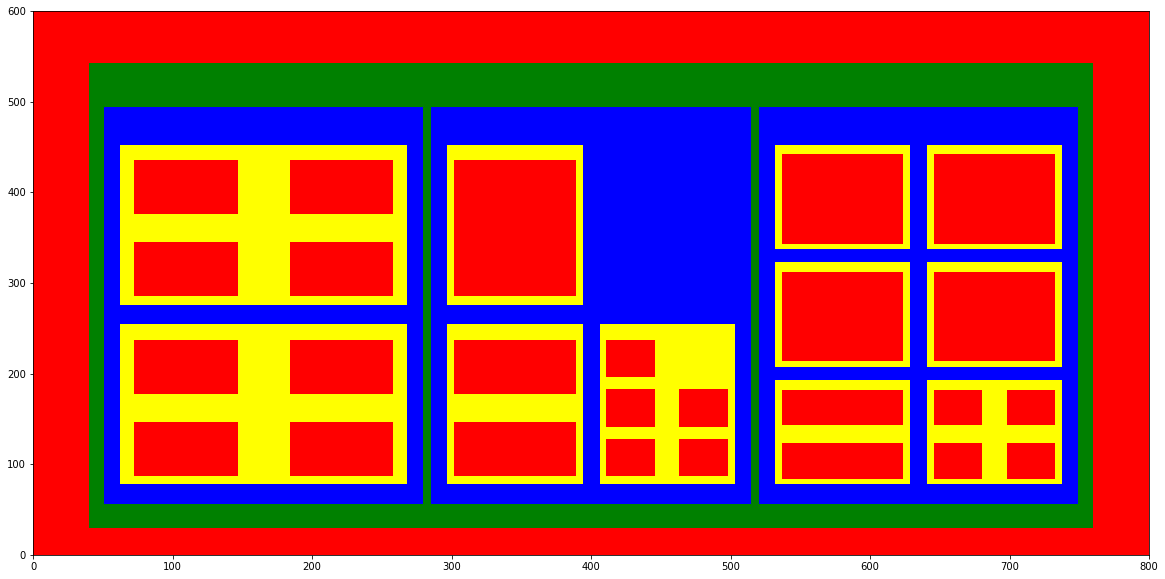

In [27]:
ch = list(root.walk_children())[::-1]
fig = plt.figure(figsize=(20,10))
from matplotlib.patches import Rectangle as rect
ax=plt.gca()
for c in ch:
    print (c.name, c.x, c.y, c.style['background_colour'], c.local_pos)
    r = rect(xy=(c.x, c.y), width=c.w, height=c.h, alpha=1.0, facecolor=c.style['background_colour'])
    #ax.text(c.x, c.y, c.name, fontsize=14,
    #            horizontalalignment='left',
    #            verticalalignment='center')
    
    ax.add_patch(r)

ax.set_xlim(0,800)
ax.set_ylim(0,600)


In [28]:
c.__dict__

{'_assigned_kwargs': {'data',
  'name',
  'parent',
  'query',
  'specification',
  'style',
  'template'},
 '_all_kwargs': {'data',
  'h',
  'local_pos',
  'name',
  'parent',
  'query',
  'specification',
  'style',
  'template',
  'w',
  'x',
  'y'},
 'name': "{'value': 'budgie'}",
 'template': 'Layer3',
 'parent': "{'classification': 'bird'}",
 'query': "(__all__==True) and (__all__==True) and (layer==0) and (classification=='bird') and (value=='budgie')",
 'data':     layer name      value classification  rand  __all__
 0       0    a        cat         mammal     1     True
 1       0    b        dog         mammal     5     True
 2       0    c      mouse         mammal     2     True
 3       0    d     parrot           bird     0     True
 4       0    e    hamster         mammal     0     True
 5       0    f    ostrich           bird     1     True
 6       0    g     turkey           bird     1     True
 7       0    h     budgie           bird     3     True
 8       1    